In [274]:
import json
import pandas as pd
import numpy as np
import os
import time
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

def jaccard_similarity(a, b):
    a = set(a.split(" "))
    b = set(b.split(" "))
    j = float(len(a.intersection(b))) / len(a.union(b))
    return j

In [275]:
item_data = pd.read_pickle("item_data.pkl")
item_data

,item_id,shopid,item_name,item_price,item_rating,item_sold,cat_0,cat_1,cat_2,cat_3,item_ctime,item_brand_id,item_comment_count
0,4526109215,169520757,de khan robot ecovacs deebot ozmo 600 hang chi...,1500,5.000000,5,100010,100038,100177,0,1586505438,1801062,1
1,3673424387,326323525,noi nau cham cach thuy 0 8l bear sube001 ban q...,4500,4.857143,175,100010,100041,100206,0,1609827461,1247566,57
2,7392791903,136097133,noi com dien tu zojirushi 1 lit ns ysq10 xj ha...,51990,5.000000,4,100010,100041,100207,0,1624596455,1802993,1
3,4496895370,264995867,may loc khong khi max air ma025 va 2 mang loc ...,19980,5.000000,2,100010,100038,100176,100458,1628331085,1250659,1
4,13052311517,65589552,luu sam3 giam 300k elsamhot giam 5 smart tivi...,240600,5.000000,10,100010,100040,100185,0,1637221639,1695294,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3564,12771696200,597699842,tai nghe gaming bluetooth hosan flydigi cyberf...,13590,0.000000,0,100535,100578,0,0,1642561258,2313207,0
3565,5453943609,95303264,may nang co lg pral total lift up,90000,5.000000,28,100630,100663,100886,101663,1600845862,1255919,6
3566,13817642232,88201679,apple iphone 13 pro max 128gb,294900,4.895522,1052,100013,100073,0,0,1632744702,1189223,205
3567,7159085799,77877479,dau doc the nho hoco 2 trong 1 cong usb 3 0 us...,380,4.937500,230,100644,101940,101987,0,1603627153,0,64


In [281]:
item_random = item_data.loc[[ np.random.randint(0,len(item_data),1)[0]]]
print("https://shopee.vn/-cLHC4151-i."+str(item_random["shopid"].values[0])+"."+str(item_random["item_id"].values[0]))
item_random

https://shopee.vn/-cLHC4151-i.267127101.6060756361


,item_id,shopid,item_name,item_price,item_rating,item_sold,cat_0,cat_1,cat_2,cat_3,item_ctime,item_brand_id,item_comment_count
2997,6060756361,267127101,noi com dien tu sharp ks com185ev sl 1 8l,11490,4.92053,387,100010,100041,100207,0,1604384394,1695295,151


In [282]:
item_recommendation = item_data[
  (item_data['cat_2'] == item_random['cat_2'].values[0])
& (item_data['shopid'] != item_random['shopid'].values[0])
]
item_recommendation

,item_id,shopid,item_name,item_price,item_rating,item_sold,cat_0,cat_1,cat_2,cat_3,item_ctime,item_brand_id,item_comment_count
2,7392791903,136097133,noi com dien tu zojirushi 1 lit ns ysq10 xj ha...,51990,5.000000,4,100010,100041,100207,0,1624596455,1802993,1
5,3465928321,254657873,ma eltefal02 giam 8 don 500k noi com dien tu ...,9440,4.863706,3176,100010,100041,100207,0,1606440728,1802658,1309
49,1235444534,11721690,freeship toan quoc tu 50k noi com dien nap li...,6165,4.333333,8,100010,100041,100207,0,1528609610,1695300,3
54,1042551664,63520892,hop com dien ham nong magic korea a03 cam,2690,4.828125,215,100010,100041,100207,0,1522838463,1076341,64
92,6672398897,259421140,noi com dien cao cap mishio mk233 0 8 lit,5900,4.750000,40,100010,100041,100207,0,1609387455,1074876,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3481,371240717,11721690,noi com dien tu zojirushi zonc ns ysq10 xj,55890,5.000000,3,100010,100041,100207,0,1500538660,1802993,1
3483,6559816495,189615586,noi com dien tu 0 75l bluestone rcb 5905,7670,4.738095,98,100010,100041,100207,0,1603946505,1071126,42
3493,4490195494,136097133,noi com dien mini lock lock ejr426 dung tich 0...,6490,4.956522,62,100010,100041,100207,0,1622197642,1801765,23
3524,2360517254,153476815,noi com dien 1l sunhouse shd8208c,5890,4.944444,48,100010,100041,100207,0,1561621489,1134377,18


In [283]:
time_now = int(time.time())
scaler = MinMaxScaler()

item_recommendation["price_diff"] = item_recommendation['item_price'].apply(lambda x: abs(x - item_random['item_price'].values[0]))
item_recommendation["jaccard_name"] = item_recommendation['item_name'].apply(lambda x: jaccard_similarity(item_random['item_name'].values[0],x) )
item_recommendation["ctime_diff"] = item_recommendation['item_ctime'].apply(lambda x: time_now - x)
item_x = item_recommendation.drop(["item_brand_id","item_ctime",'item_price','cat_0','cat_1','cat_2','cat_3'], axis = 1)
item_x[['item_rating','item_sold','item_comment_count','price_diff','jaccard_name','ctime_diff']] = scaler.fit_transform(item_x[['item_rating','item_sold','item_comment_count','price_diff','jaccard_name','ctime_diff']])
item_x

<ipython-input-283-ae736d8c64a3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  item_recommendation["price_diff"] = item_recommendation['item_price'].apply(lambda x: abs(x - item_random['item_price'].values[0]))
<ipython-input-283-ae736d8c64a3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  item_recommendation["jaccard_name"] = item_recommendation['item_name'].apply(lambda x: jaccard_similarity(item_random['item_name'].values[0],x) )
<ipython-input-283-ae736d8c64a3>:6: SettingWithCopyWarning: 
A value i

,item_id,shopid,item_name,item_rating,item_sold,item_comment_count,price_diff,jaccard_name,ctime_diff
2,7392791903,136097133,noi com dien tu zojirushi 1 lit ns ysq10 xj ha...,1.000000,0.001259,0.000764,0.473179,0.417476,0.109333
5,3465928321,254657873,ma eltefal02 giam 8 don 500k noi com dien tu ...,0.972741,1.000000,1.000000,0.023040,0.429126,0.219686
49,1235444534,11721690,freeship toan quoc tu 50k noi com dien nap li...,0.866667,0.002519,0.002292,0.061381,0.195057,0.692756
54,1042551664,63520892,hop com dien ham nong magic korea a03 cam,0.965625,0.067695,0.048892,0.102063,0.055016,0.727834
92,6672398897,259421140,noi com dien cao cap mishio mk233 0 8 lit,0.950000,0.012594,0.015279,0.064483,0.184466,0.201776
...,...,...,...,...,...,...,...,...,...
3481,371240717,11721690,noi com dien tu zojirushi zonc ns ysq10 xj,1.000000,0.000945,0.000764,0.518837,0.363107,0.863375
3483,6559816495,189615586,noi com dien tu 0 75l bluestone rcb 5905,0.947619,0.030856,0.032086,0.043761,0.363107,0.234847
3493,4490195494,136097133,noi com dien mini lock lock ejr426 dung tich 0...,0.991304,0.019521,0.017571,0.057576,0.275081,0.123914
3524,2360517254,153476815,noi com dien 1l sunhouse shd8208c,0.988889,0.015113,0.013751,0.064600,0.292009,0.492105


In [284]:
m1 = np.array(item_x[['item_rating','item_sold','item_comment_count','price_diff','jaccard_name','ctime_diff']])
m2 = np.array([
    [2],  # item_rating
    [1],  # item_sold
    [1],  # item_comment_count
    [-3], # price_diff
    [7], # jaccard_name
    [-2]] # ctime_diff
)
m3 = np.dot(m1,m2)
m3 = m3.reshape(m3.shape[0],)

item_x["score"] = m3
item_x = item_x.sort_values(by="score",ascending=False)[:50]
item_x = item_x.drop(['item_name','item_rating',
                      'item_sold','item_comment_count',
                      'price_diff','jaccard_name',
                      'ctime_diff'], axis = 1)
item_x

,item_id,shopid,score
1858,9767005868,20009052,8.771895
997,7157931352,53621981,7.366751
2101,2710730652,11721690,7.213984
737,7633244755,53621981,7.053715
1335,4633473495,153476815,7.027532
2013,4604280919,153476815,6.979182
2081,619113502,34896130,6.571705
5,3465928321,254657873,6.440874
1381,619113405,34896130,6.404354
520,6142350625,284593651,6.295328


In [285]:
shop_score = pd.read_pickle("shop_data.pkl")
item_x = item_x.merge(shop_score, on='shopid', how='left')
item_x

,item_id,shopid,score,shop_slug,shop_score
0,9767005868,20009052,8.771895,mrhahoanganh,0.490841
1,7157931352,53621981,7.366751,comet_homeappliances,0.521813
2,2710730652,11721690,7.213984,bsmartvn,0.484668
3,7633244755,53621981,7.053715,comet_homeappliances,0.521813
4,4633473495,153476815,7.027532,greenbox.official,0.481634
5,4604280919,153476815,6.979182,greenbox.official,0.481634
6,619113502,34896130,6.571705,kynguyen024,0.552493
7,3465928321,254657873,6.440874,tefal_vn_official,0.612906
8,619113405,34896130,6.404354,kynguyen024,0.552493
9,6142350625,284593651,6.295328,philips_homeappliances,0.538177


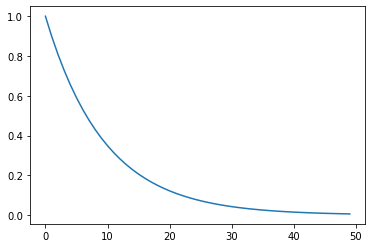

In [286]:
# def graph(func, x_range):
x = np.arange(0,50)
y = np.power(0.9, x)
plt.plot(x, y)
# graph(lambda x: (), (0,50))

In [287]:
item_x["weight"] = y
item_x["shop_score_weight"] = item_x["shop_score"] * item_x["weight"]
item_x

,item_id,shopid,score,shop_slug,shop_score,weight,shop_score_weight
0,9767005868,20009052,8.771895,mrhahoanganh,0.490841,1.000000,0.490841
1,7157931352,53621981,7.366751,comet_homeappliances,0.521813,0.900000,0.469631
2,2710730652,11721690,7.213984,bsmartvn,0.484668,0.810000,0.392581
3,7633244755,53621981,7.053715,comet_homeappliances,0.521813,0.729000,0.380401
4,4633473495,153476815,7.027532,greenbox.official,0.481634,0.656100,0.316000
5,4604280919,153476815,6.979182,greenbox.official,0.481634,0.590490,0.284400
6,619113502,34896130,6.571705,kynguyen024,0.552493,0.531441,0.293617
7,3465928321,254657873,6.440874,tefal_vn_official,0.612906,0.478297,0.293151
8,619113405,34896130,6.404354,kynguyen024,0.552493,0.430467,0.237830
9,6142350625,284593651,6.295328,philips_homeappliances,0.538177,0.387420,0.208501


In [288]:
shop_recommendation = item_x.groupby(['shop_slug'])['shop_score_weight'].agg('sum').reset_index()
shop_recommendation = shop_recommendation.sort_values(by="shop_score_weight",ascending=False)
shop_recommendation

,shop_slug,shop_score_weight
5,greenbox.official,0.990656
2,comet_homeappliances,0.907815
6,kynguyen024,0.715858
10,mrhahoanganh,0.576031
1,bsmartvn,0.403500
14,tefal_vn_official,0.342040
3,electrolux_official_store,0.278753
13,philips_homeappliances,0.225132
11,nagakawa_official_store,0.187673
0,bluestone_vietnam,0.184130
